In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from scipy import signal
from scipy.io import wavfile as wav
import statistics as stats
import sys

# Allows me to import my modules
sys.path.append('./modules')

# The python definition of f(x) for problem 1.
from audio_utils import *

Attempting to read settings file...
	Read successfully!


In [3]:
data = get_sample_data("raw")

In [4]:
def plot(title, samples, sample_rate, ylim=None):
    # Plot the signal read from wav file
    
    plt.subplot(211)

    plt.title(title)

    a = plt.plot(samples)
    
    plt.xlabel('Sample')

    plt.ylabel('Amplitude')

    plt.subplot(212)

    plt.specgram(samples, Fs=sample_rate)
    
    plt.ylim((0, int(sample_rate / 2)) if ylim is None else ylim)

    plt.xlabel('Time')

    plt.ylabel('Frequency')

    plt.show()

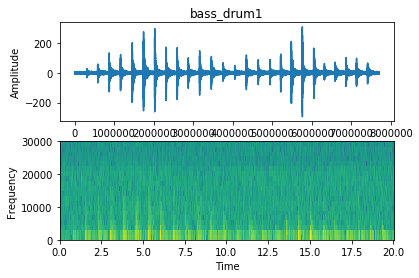

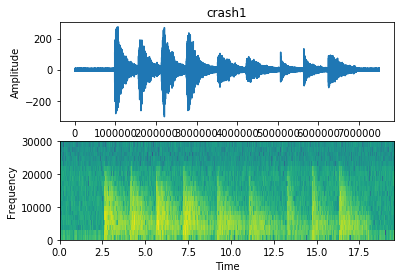

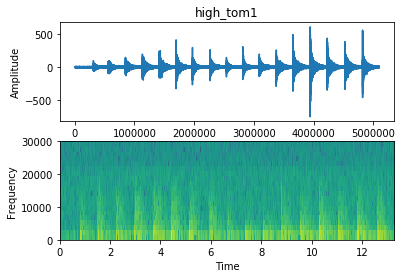

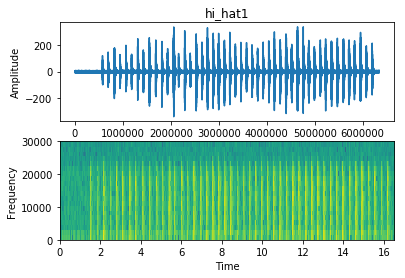

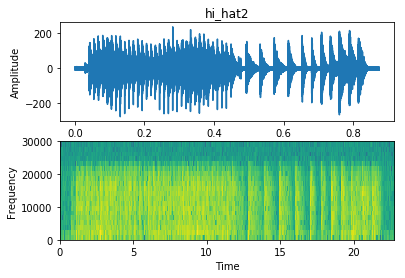

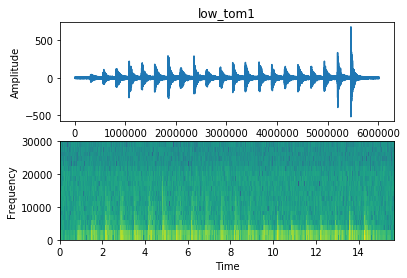

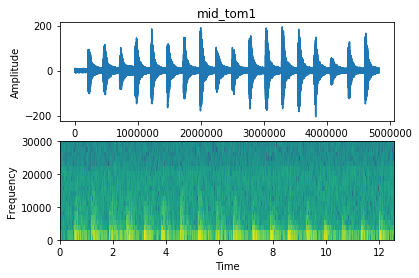

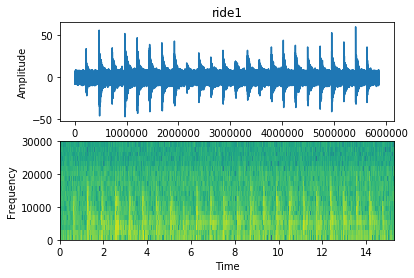

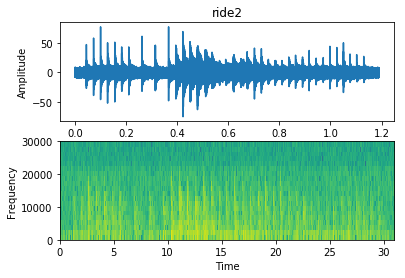

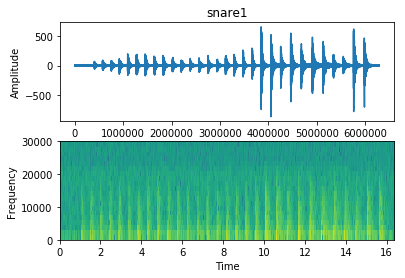

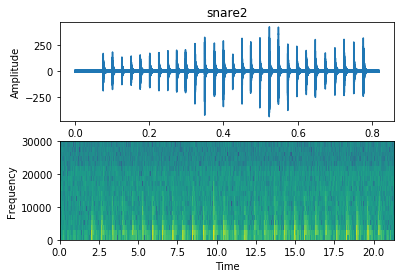

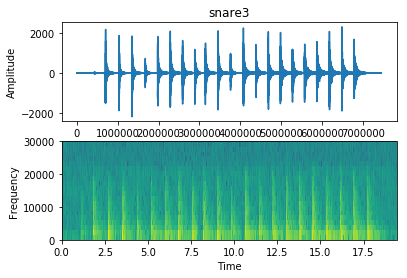

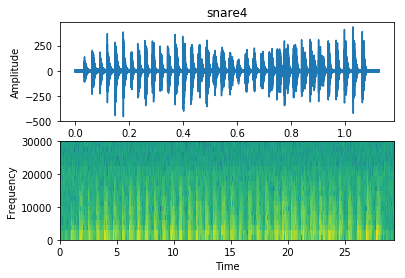

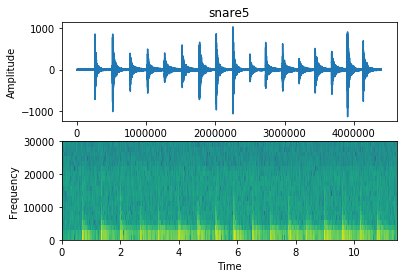

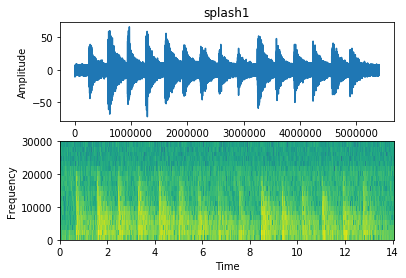

In [4]:
kit_label_count = {kl: 0 for kl in SETTINGS.kit_labels}
for d in data:
    label = d.labels["kit_label"]
    kit_label_count[label] += 1
    # Changes the Frequency (y-limits) to between 0 and 30000
    plot(title=label+str(kit_label_count[label]), samples=d.data, sample_rate=d.rate, ylim=(0, 30000))

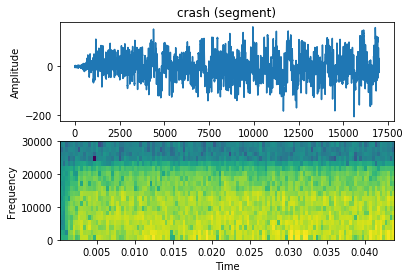

In [5]:
plot("crash (segment)", data[1].data[983000:1000000], data[1].rate, (0, 30000))

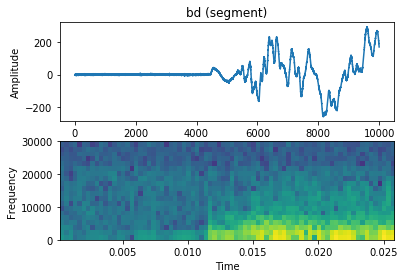

In [6]:
plot("bd (segment)", data[0].data[2015000:2025000], data[0].rate, (0, 30000))

In [5]:
resampled_bd = reduce_sample_rate(data[0], 1000)

c:\users\danzi\appdata\local\programs\python\python35\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
c:\users\danzi\appdata\local\programs\python\python35\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]


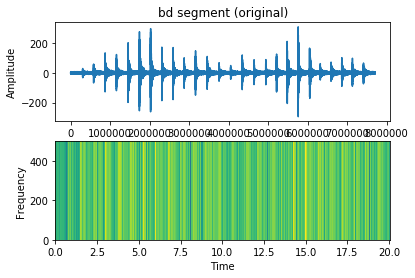

In [6]:
plot("bd segment (original)", data[0].data, data[0].rate, ylim=(0, 500))

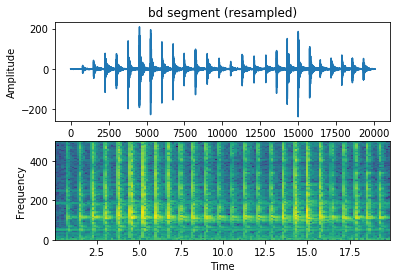

In [9]:
plot("bd segment (resampled)", resampled_bd.data, resampled_bd.rate, ylim=(0, 500))

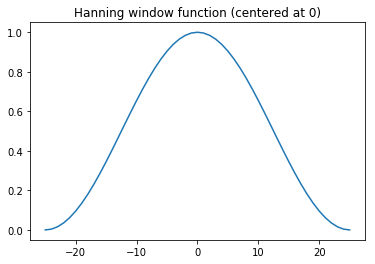

In [10]:
# Energy based novelty
w = np.array(signal.hann(51))
xs = np.array([i for i in range(-25, 26)])
plt.plot(xs, w)
plt.title("Hanning window function (centered at 0)")
plt.show()

In [7]:
start_time = time.time()
bd_local_energy = local_energy_func(resampled_bd.data, 100)
end_time = time.time()
print(round(end_time-start_time, 3))

2.164


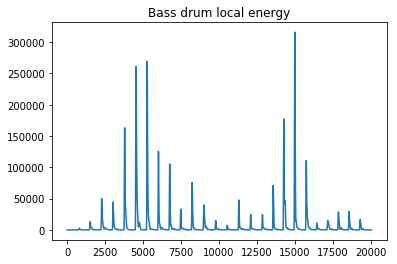

In [8]:
plt.plot(bd_local_energy)
plt.title("Bass drum local energy")
plt.show()

In [13]:
start_time = time.time()
bd_ebn = energy_based_novelty(resampled_bd.data, 100)
end_time = time.time()
print(round(end_time-start_time, 3))

2.358


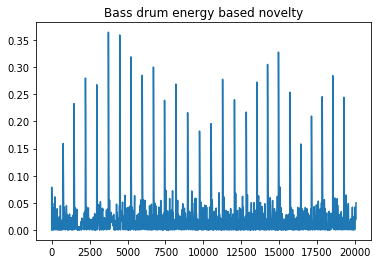

In [14]:
plt.plot(bd_ebn)
plt.title("Bass drum energy based novelty")
plt.show()

In [15]:
stats.stdev(bd_ebn)

0.036511984559853314

In [10]:
onset_points = onset_detection(data=resampled_bd, N=100, sds=4)
onset_points

array([  754,  1467,  2222,  2971,  3736,  4483,  5221,  5965,  6704,
        7435,  8185,  8957,  9743, 10505, 11262, 12045, 12824, 13527,
       14227, 14947, 15710, 16418, 17121, 17828, 18526, 19258])

[ 289536  563328  853248 1140864 1434624 1721472 2004864 2290560 2574336
 2855040 3143040 3439488 3741312 4033920 4324608 4625280 4924416 5194368
 5463168 5739648 6032640 6304512 6574464 6845952 7113984 7395072]


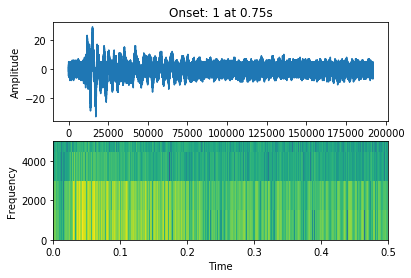

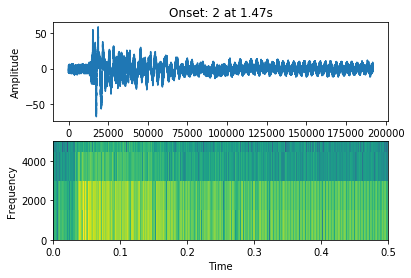

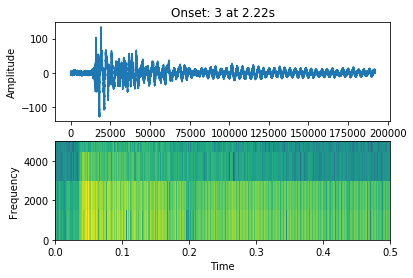

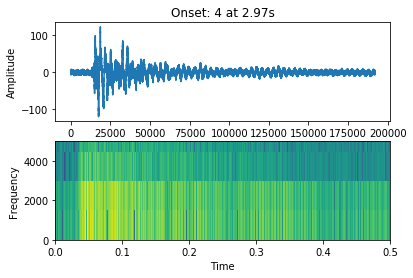

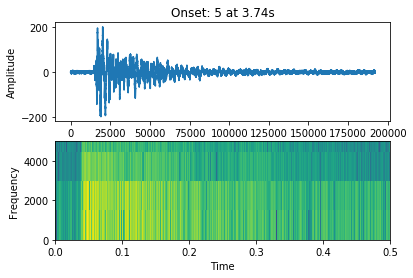

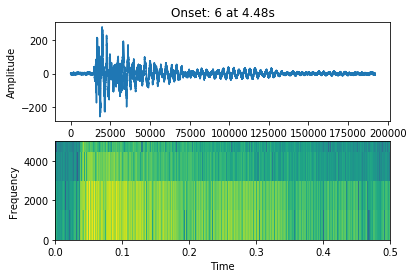

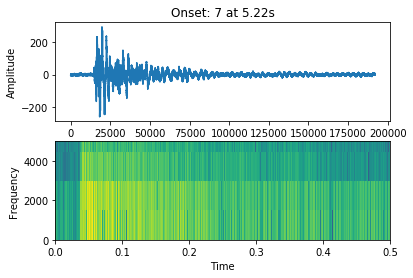

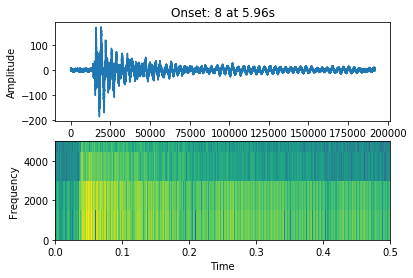

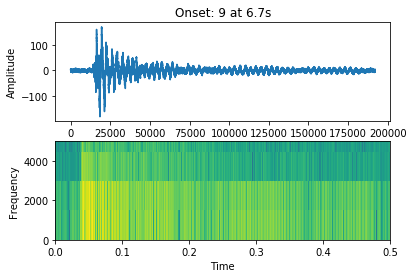

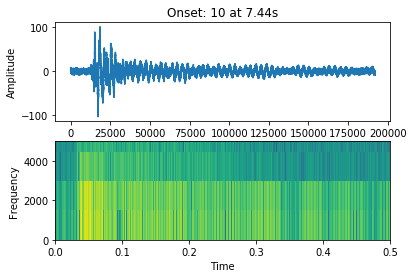

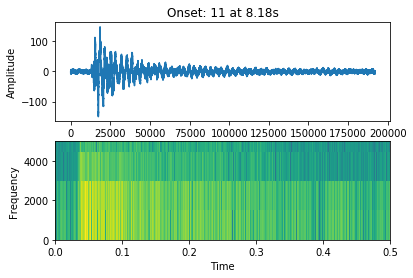

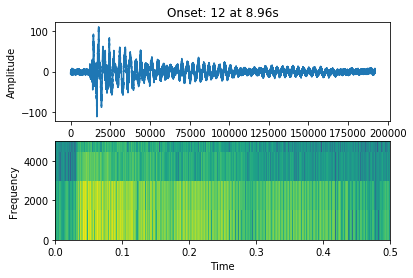

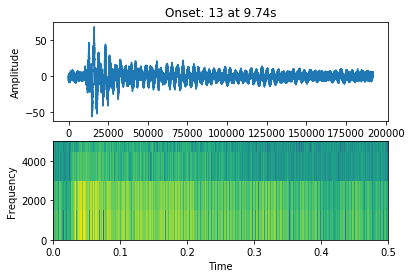

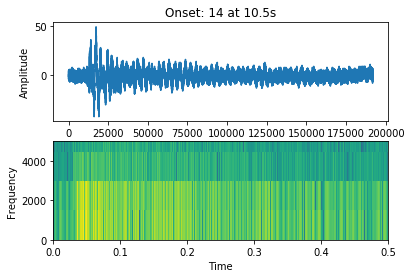

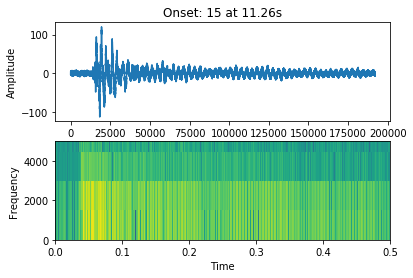

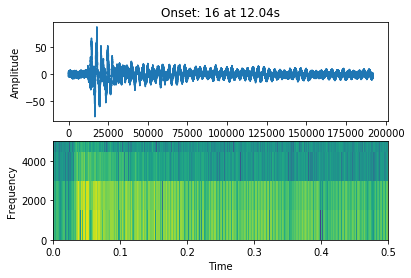

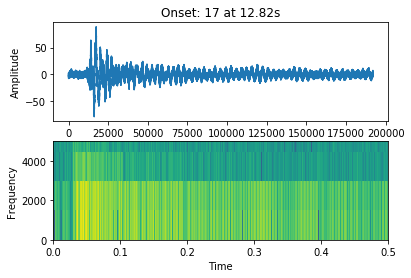

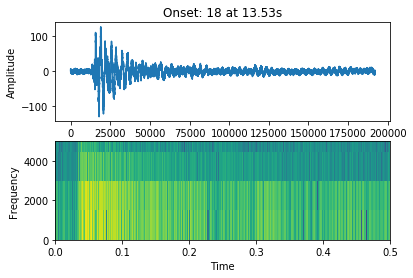

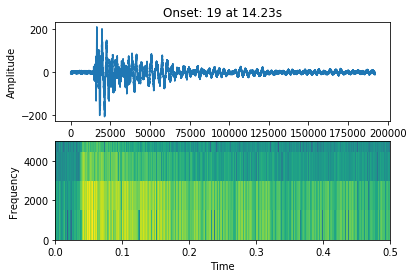

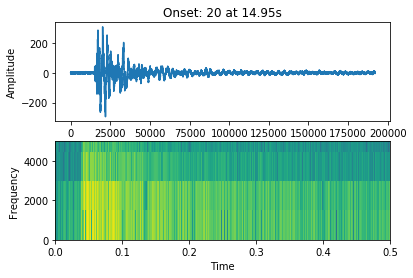

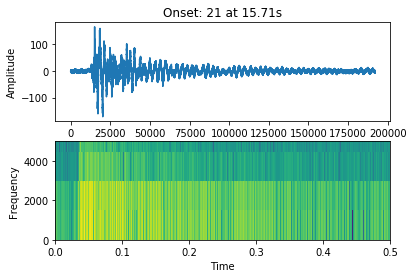

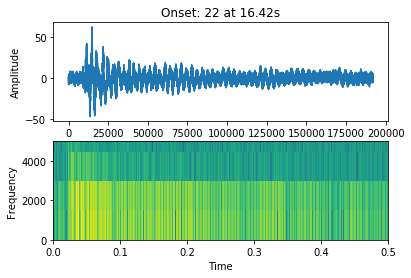

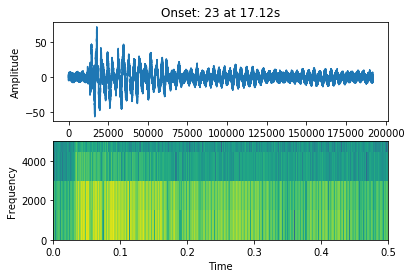

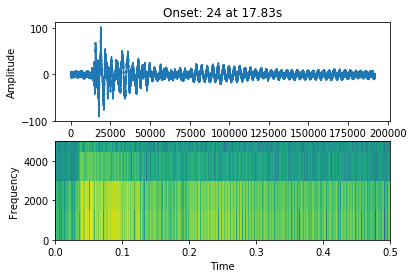

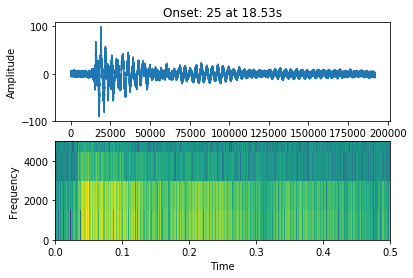

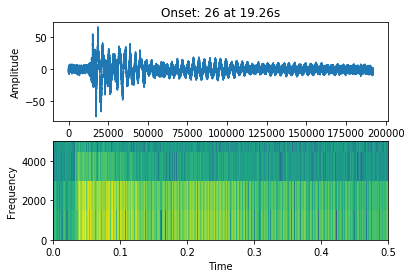

In [11]:
sample_m = data[0].rate/resampled_bd.rate # old/new (sample rate)
onset_points *= int(sample_m)
print(onset_points)
# Using onset to crop original audio data spectra
for i in range(len(onset_points)):
    start = onset_points[i]
    end = start+int(data[0].rate*0.5)
    seg = data[0].data[start:end]
    t = round(start/data[0].rate, 2)
    plot("Onset: {} at {}s".format(i+1, t), seg, data[0].rate, (0, 5000))
    

In [19]:
def save_figure(title, samples, sample_rate):
    # Plot the signal read from wav file
    plt.subplot(2, 1, 1)

    plt.title(title)

    plt.plot(samples)
    
    plt.xlabel('Sample')

    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)

    plt.specgram(samples, Fs=sample_rate)
    
    plt.ylim((0, 30000))

    plt.xlabel('Time')

    plt.ylabel('Frequency')

    plt.savefig(title+".pdf")
    
    plt.close()

In [12]:
data_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 14]
resampled_data = [reduce_sample_rate(data[i], SETTINGS.cropping["down_sampling_rate"]) for i in data_indices]
cs_resampled = resampled_data[0]
ht_resampled = resampled_data[1]
hhc_resampled = resampled_data[2]
hho_resampled = resampled_data[3]
lt_resampled = resampled_data[4]
mt_resampled = resampled_data[5]
rs_resampled = resampled_data[6]
rsb_resampled = resampled_data[7]
s_resampled = resampled_data[8]
ss_resampled = resampled_data[9]


c:\users\danzi\appdata\local\programs\python\python35\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] += X[sl]  # add the component of X at N/2


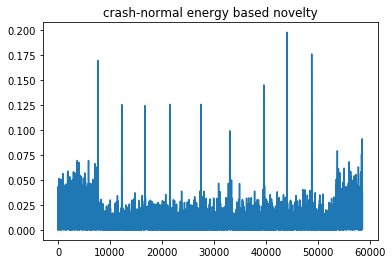

SD: 0.013 	Mean: 0.013


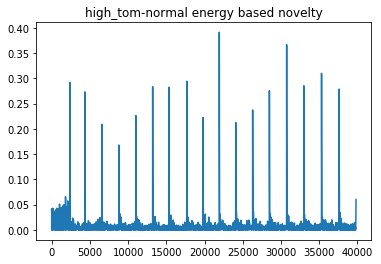

SD: 0.022 	Mean: 0.009


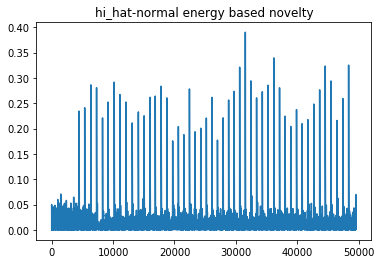

SD: 0.031 	Mean: 0.02


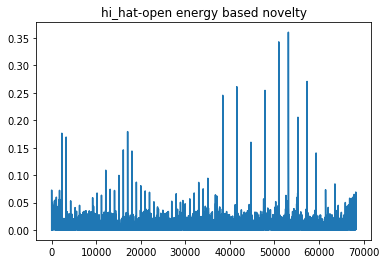

SD: 0.016 	Mean: 0.013


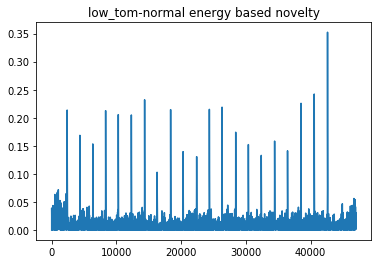

SD: 0.018 	Mean: 0.012


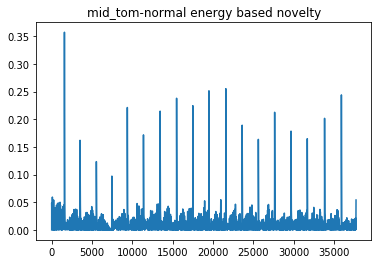

SD: 0.02 	Mean: 0.014


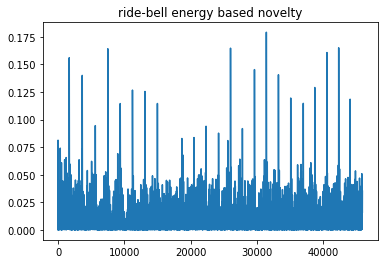

SD: 0.016 	Mean: 0.017


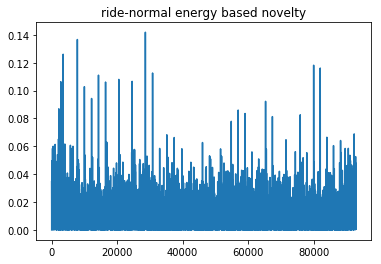

SD: 0.012 	Mean: 0.014


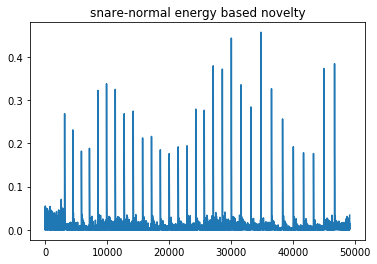

SD: 0.027 	Mean: 0.013


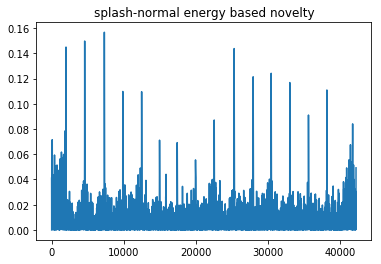

SD: 0.013 	Mean: 0.012


In [21]:
for rd in resampled_data:
    start_time = time.time()
    rd_ebn = energy_based_novelty(rd.data, 100)
    end_time = time.time()
    plt.plot(rd_ebn)
    plt.title("{}-{} energy based novelty".format(rd.labels["kit_label"], rd.labels["tech_label"]))
    plt.show()
    print("SD:", round(stats.stdev(rd_ebn), 3), "\tMean:", round(np.average(rd_ebn), 3), "\nExecution time: ", round(end_time-start_time, 3))

In [13]:
def threshold_func(ebn, N, c1, c2):
    ebn_len = len(ebn)
    half_N = int(N/2)
    padding = np.array([0.0 for i in range(half_N)])
    padded_ebn = np.concatenate((padding, ebn, padding))
    detection_thresholds = []
    for dv in range(half_N, ebn_len+half_N):
        ebn_seg = padded_ebn[dv-half_N:dv+half_N]
        median = np.median(np.abs(ebn_seg))
        detection_thresholds.append(c1+c2*median)
    return np.array(detection_thresholds)

In [15]:
cs_ebn = energy_based_novelty(cs_resampled.data, 300)

In [16]:
cs_ebn_tf = threshold_func(cs_ebn, 3000, 2*stats.stdev(cs_ebn), 5)

In [161]:
print(len(cs_ebn), len(cs_ebn_tf))

58610 58610


In [160]:
print(cs_ebn[1], cs_ebn_tf[1], stats.stdev(cs_ebn))

0.01479818264892359 0.008556632990353114 0.005591119377935809


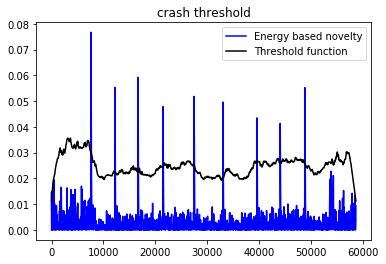

In [209]:
xs = np.linspace(start=0, stop=len(cs_resampled.data))
plt.plot(cs_ebn, color="blue")
plt.plot(cs_ebn_tf, color="black")
plt.legend(["Energy based novelty", "Threshold function"])
plt.title("crash threshold")
plt.show()

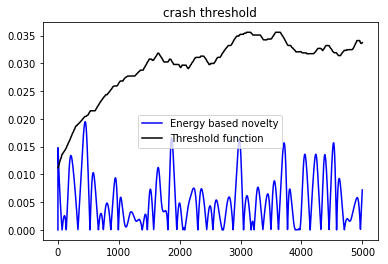

In [213]:
xs = np.linspace(start=0, stop=len(cs_resampled.data))
plt.plot(cs_ebn[0:5000], color="blue")
plt.plot(cs_ebn_tf[0:5000], color="black")
plt.legend(["Energy based novelty", "Threshold function"])
plt.title("crash threshold")
plt.show()

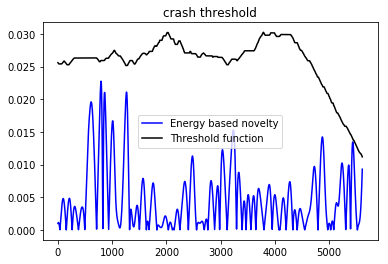

In [17]:
xs = np.linspace(start=0, stop=len(cs_resampled.data))
plt.plot(cs_ebn[53000:], color="blue")
plt.plot(cs_ebn_tf[53000:], color="black")
plt.legend(["Energy based novelty", "Threshold function"])
plt.title("crash threshold")
plt.show()

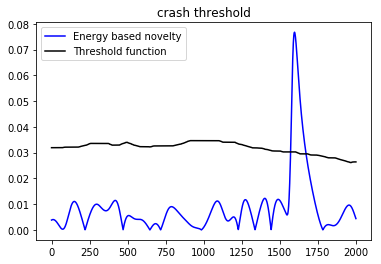

In [211]:
xs = np.linspace(start=0, stop=len(cs_resampled.data))
plt.plot(cs_ebn[6000:8000], color="blue")
plt.plot(cs_ebn_tf[6000:8000], color="black")
plt.legend(["Energy based novelty", "Threshold function"])
plt.title("crash threshold")
plt.show()

In [18]:
def peak_picking(ebn, threshold, trim=1000, e_g=0.5):
    peaks = []
    prev_grad = None
    for i in range(trim, len(ebn)-trim*2):
        g = ebn[i+1]-ebn[i]
        above_threshold = ebn[i] > threshold[i]
        # Find the peaks in ebn above the threshold function
        if (above_threshold and g < 0 and prev_grad > 0):
            peaks.append(i)
        prev_grad = g
    return peaks

In [225]:
peak_picking(cs_ebn, cs_ebn_tf)

[7596, 12211, 16652, 21464, 27448, 33001, 39557, 44028, 48784]

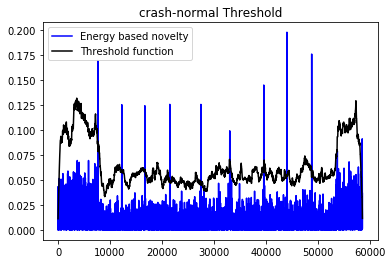

Execution time: 10.788


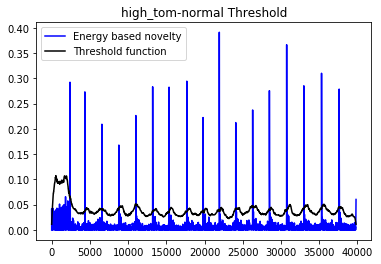

Execution time: 7.425


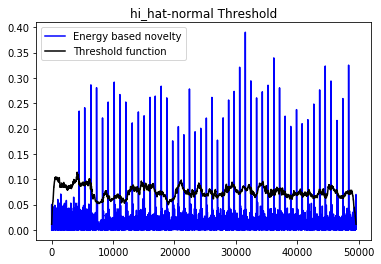

Execution time: 9.165


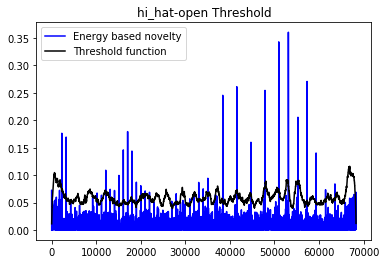

Execution time: 12.354


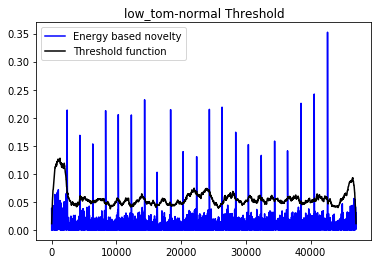

Execution time: 8.614


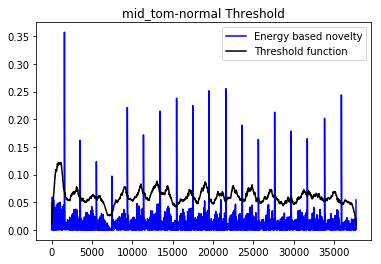

Execution time: 7.023


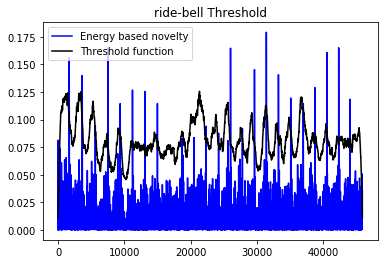

Execution time: 8.641


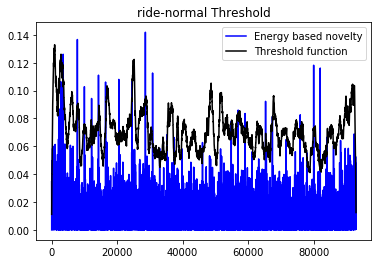

Execution time: 16.68


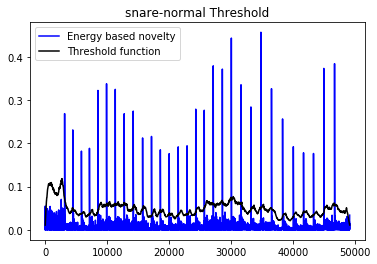

Execution time: 9.09


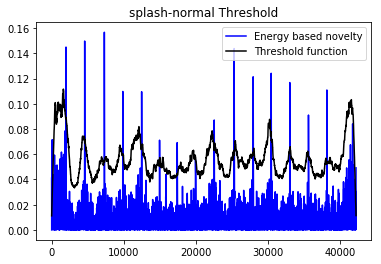

Execution time: 7.704


In [227]:
for rd in resampled_data:
    start_time = time.time()
    rd_ebn = energy_based_novelty(rd.data, 100)
    rd_ebn_tf = threshold_func(rd_ebn, 1000, 2*stats.stdev(cs_ebn), 5)
    end_time = time.time()
    plt.plot(rd_ebn, color="blue")
    plt.plot(rd_ebn_tf, color="black")
    plt.legend(["Energy based novelty", "Threshold function"])
    plt.title("{}-{} Threshold".format(rd.labels["kit_label"], rd.labels["tech_label"]))
    plt.show()
    print("Execution time:", round(end_time-start_time, 3))

In [22]:
peaks = []
for rd in resampled_data:
    start_time = time.time()
    rd_ebn = energy_based_novelty(rd.data, 100)
    rd_ebn_tf = threshold_func(rd_ebn, 1000, 2*stats.stdev(cs_ebn), 5)
    peaks.append(peak_picking(rd_ebn, rd_ebn_tf))
    end_time = time.time()
    print("Execution time:", round(end_time - start_time, 3))

Execution time: 9.972
Execution time: 6.827
Execution time: 8.402
Execution time: 11.415
Execution time: 8.036
Execution time: 6.438
Execution time: 7.793
Execution time: 15.381
Execution time: 8.281
Execution time: 7.181


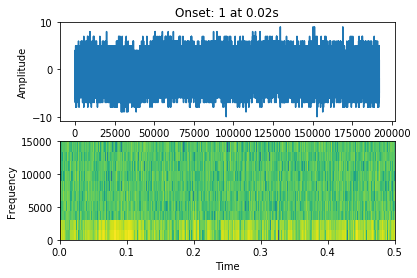

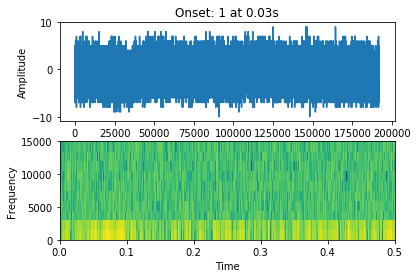

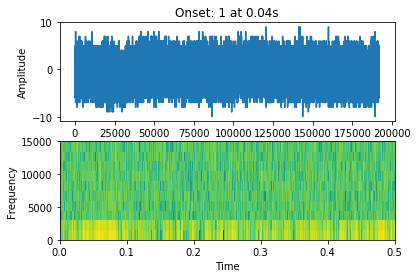

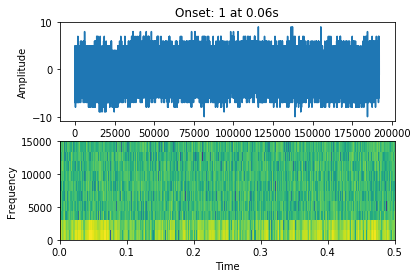

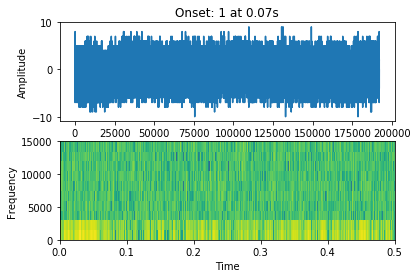

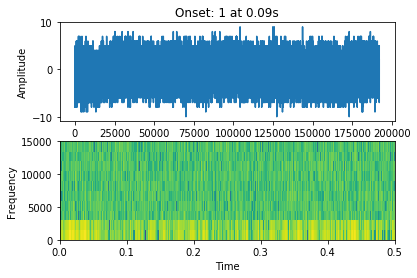

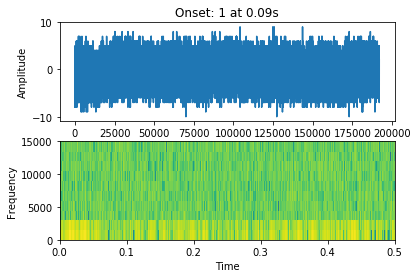

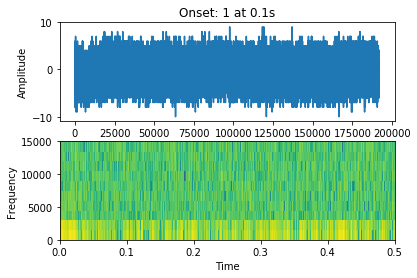

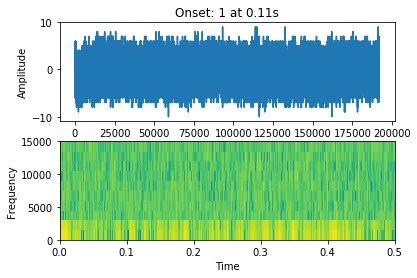

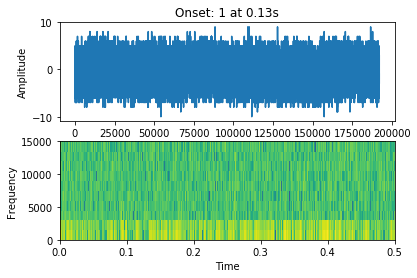

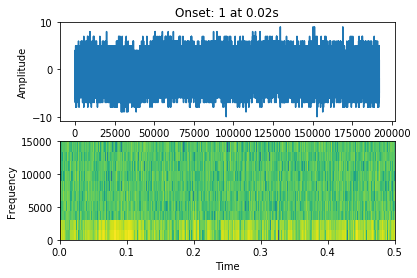

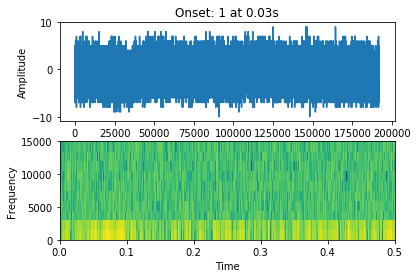

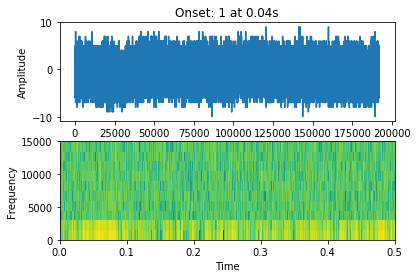

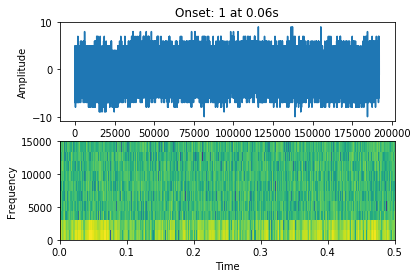

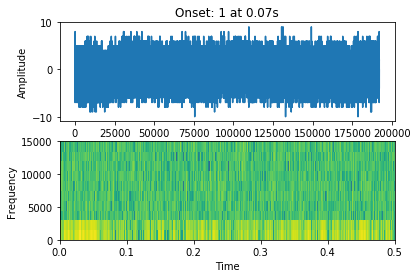

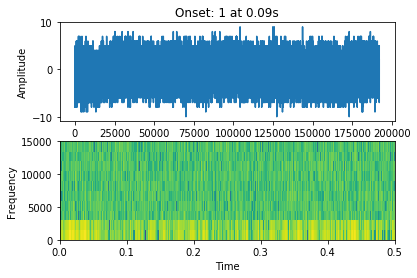

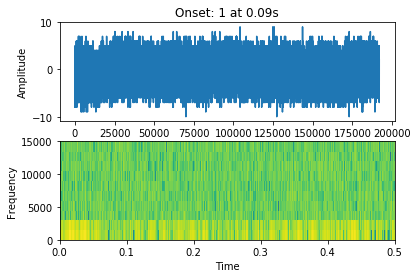

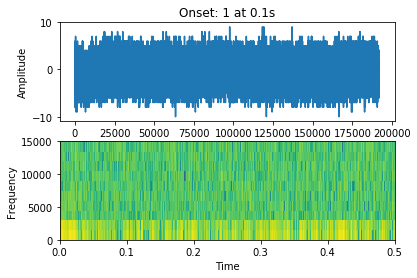

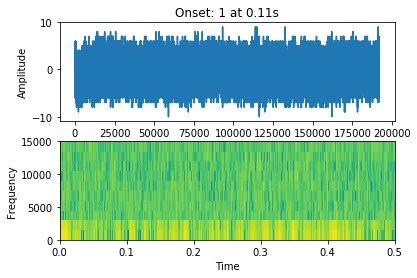

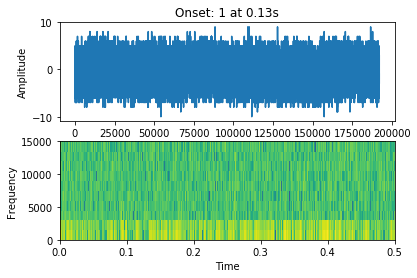

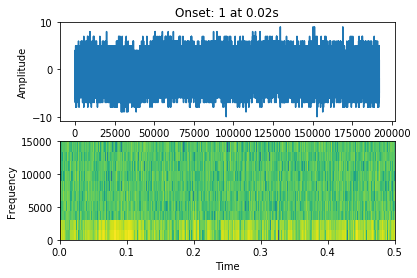

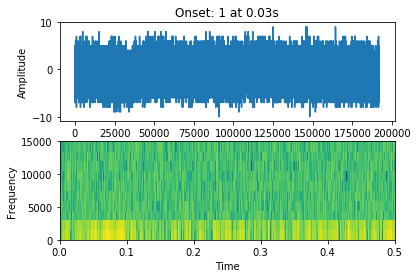

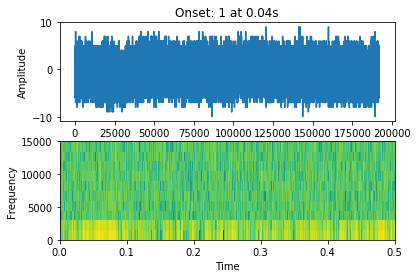

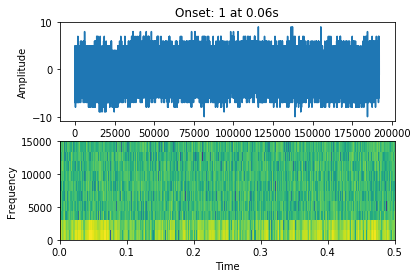

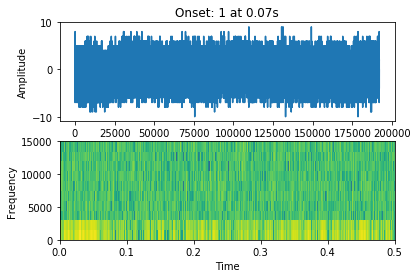

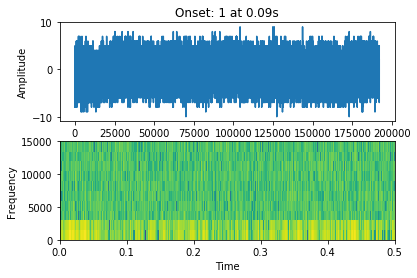

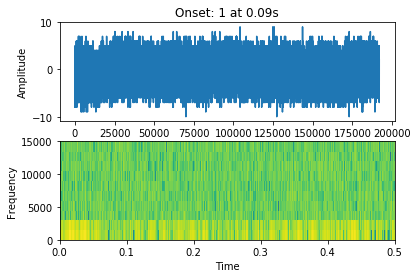

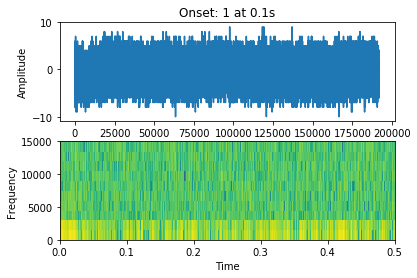

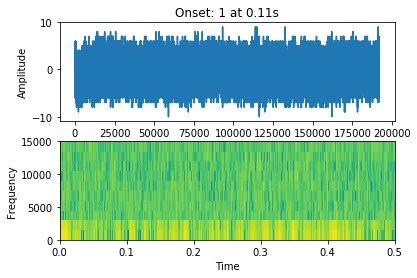

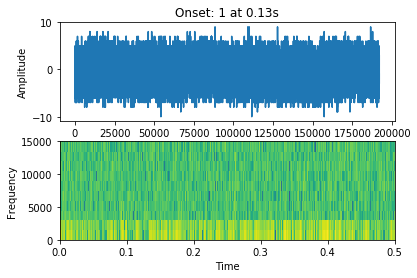

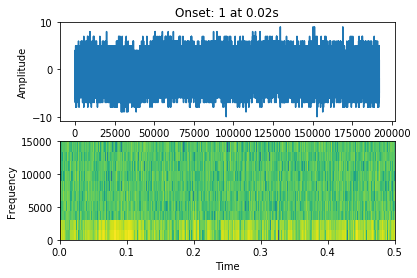

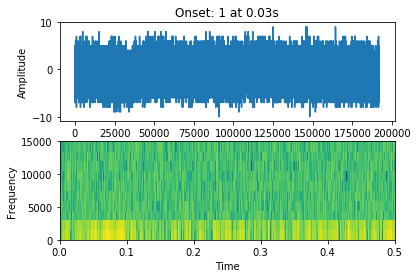

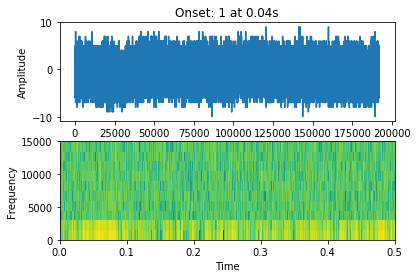

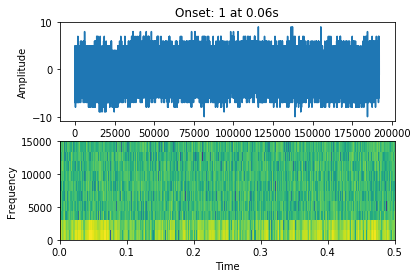

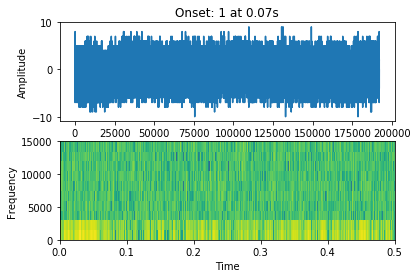

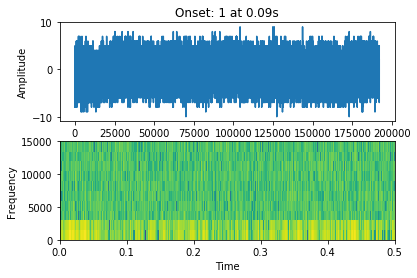

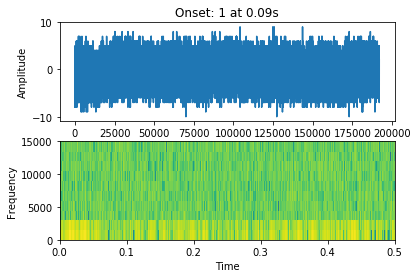

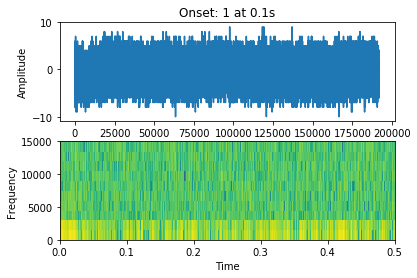

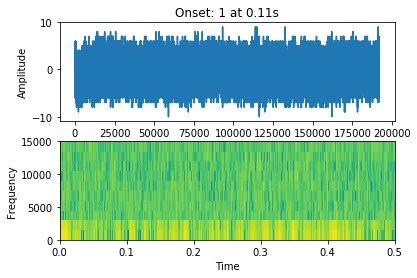

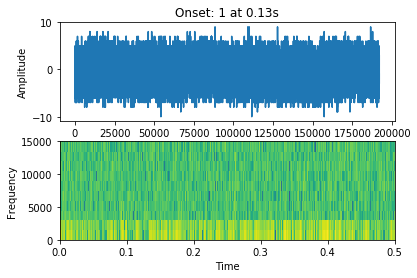

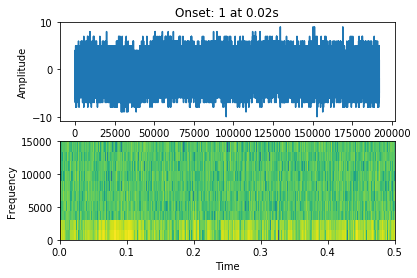

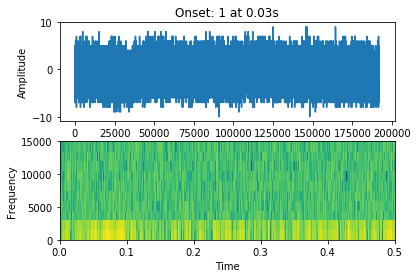

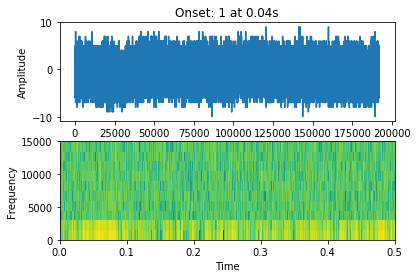

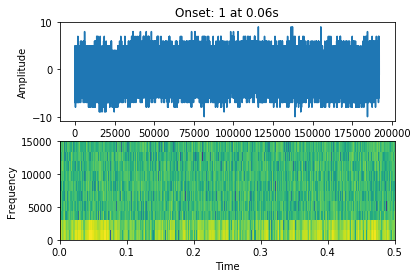

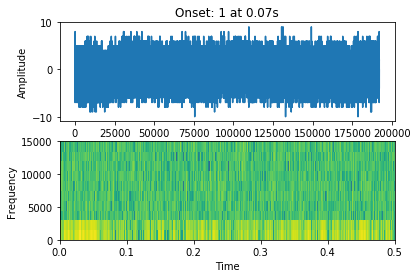

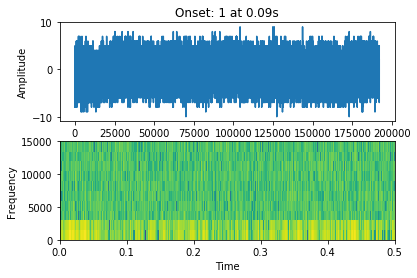

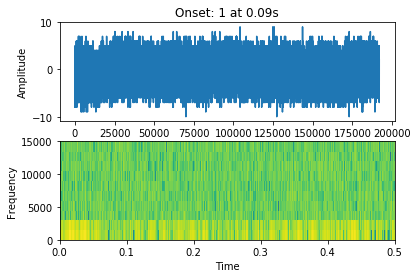

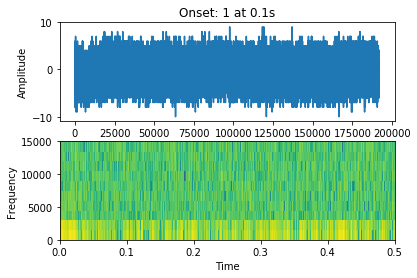

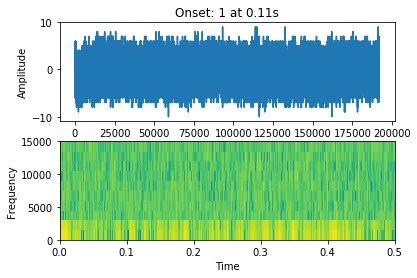

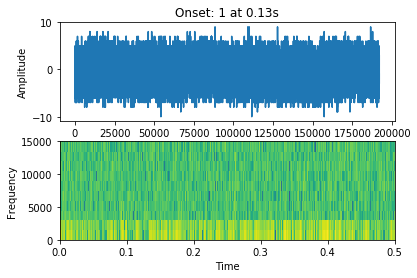

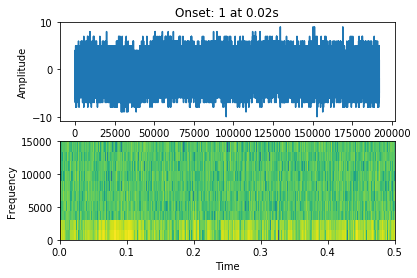

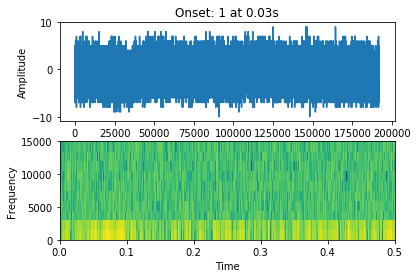

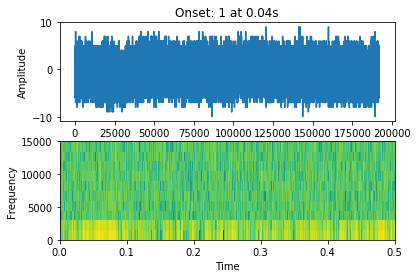

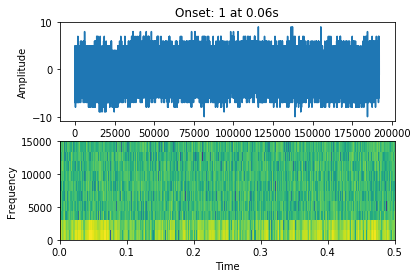

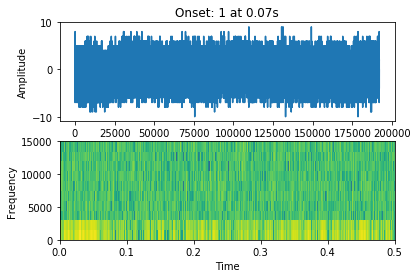

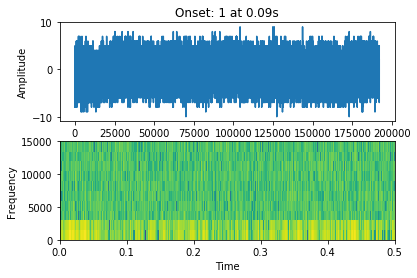

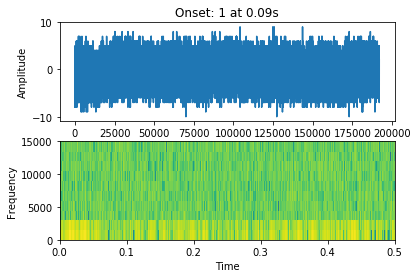

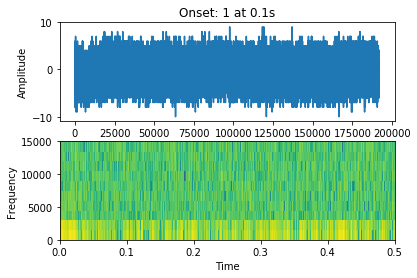

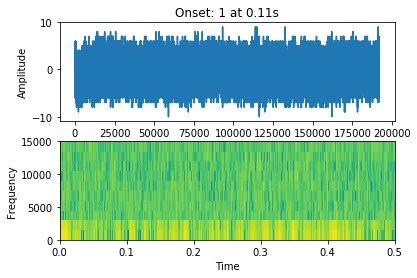

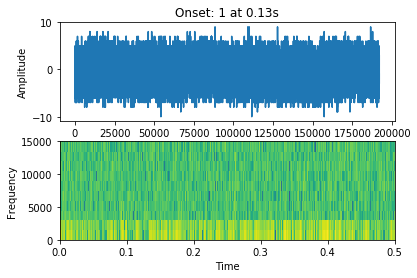

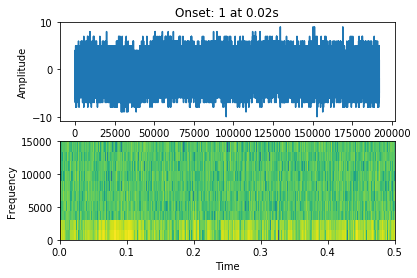

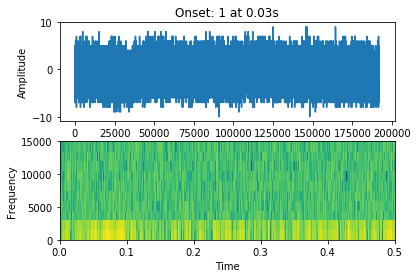

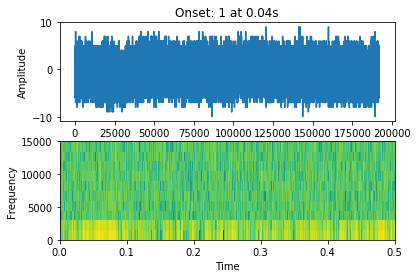

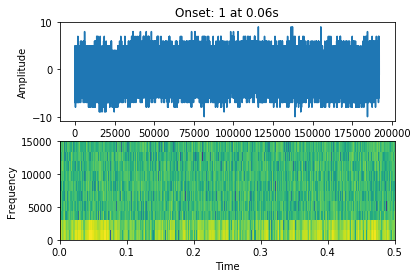

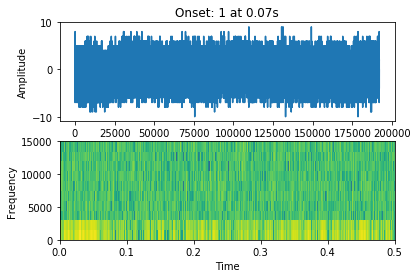

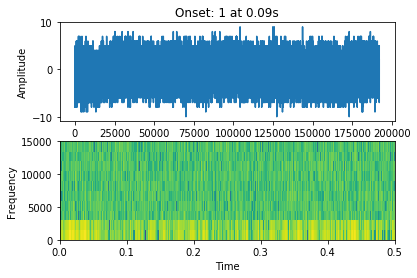

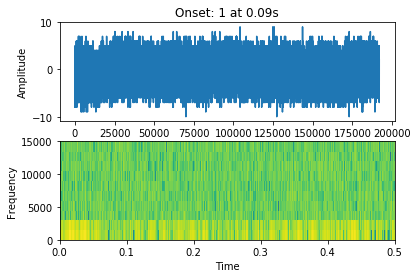

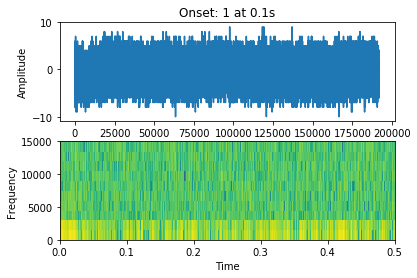

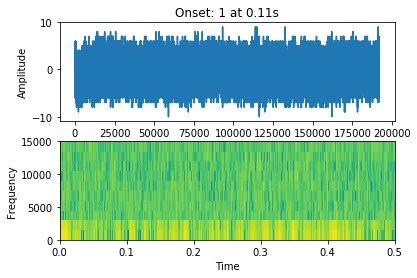

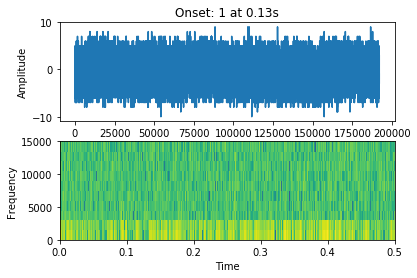

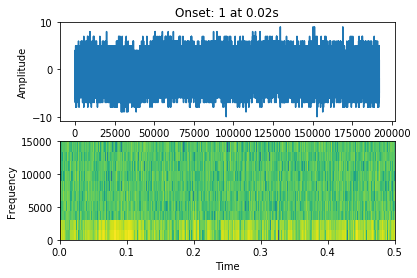

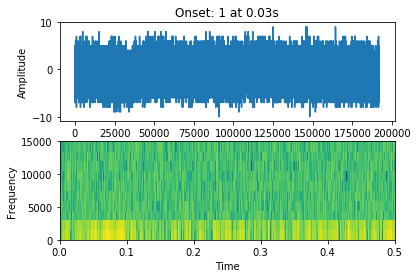

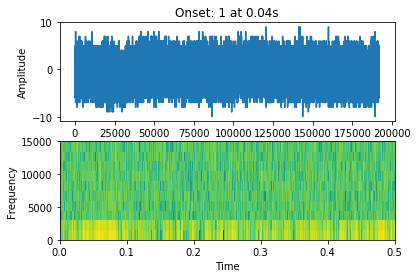

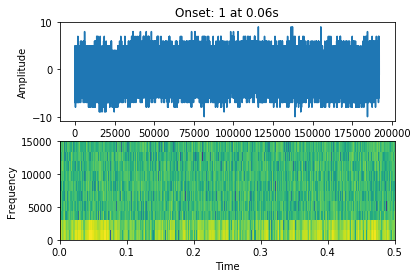

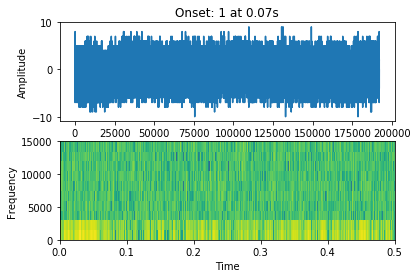

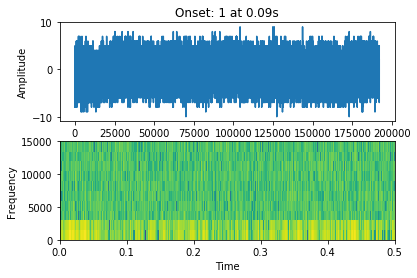

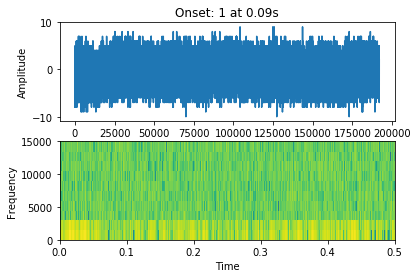

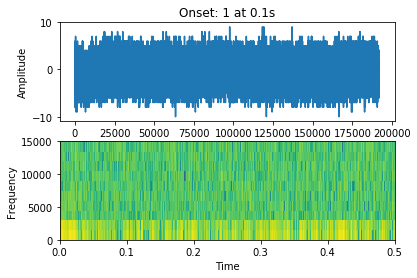

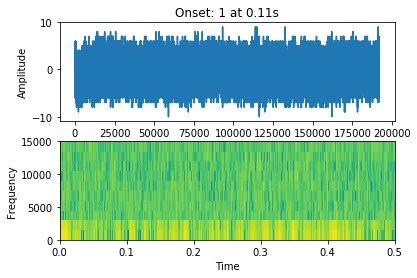

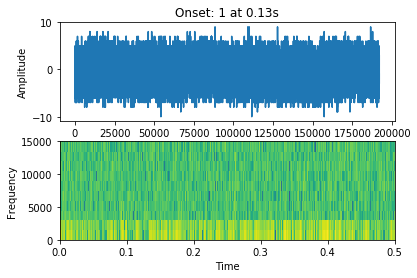

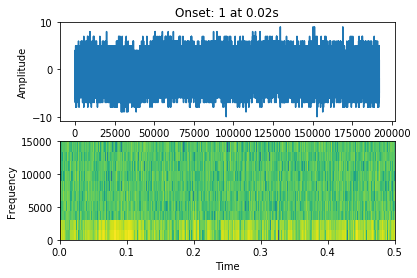

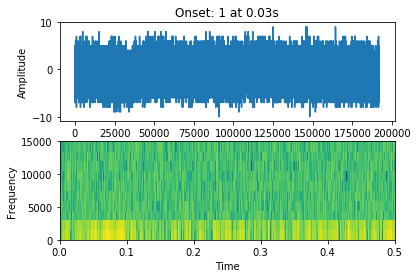

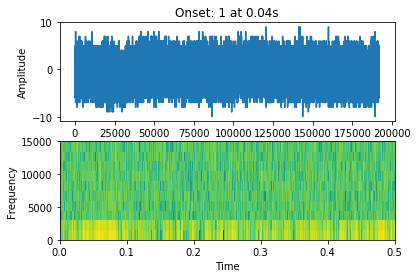

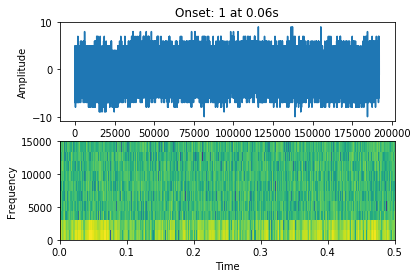

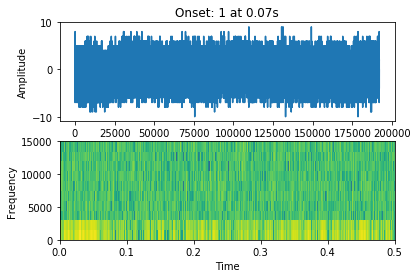

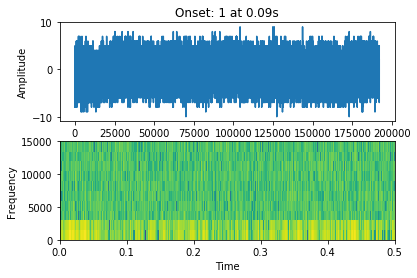

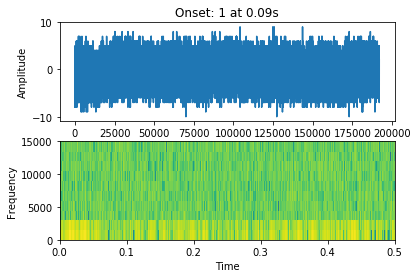

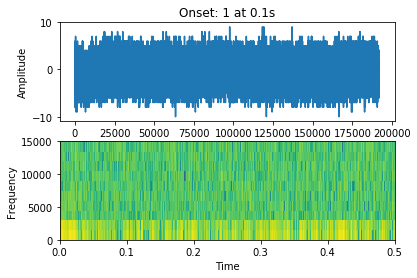

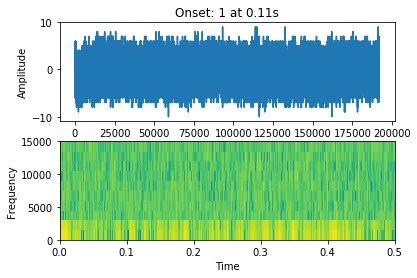

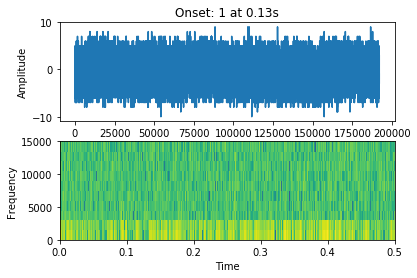

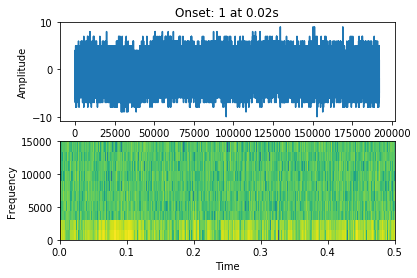

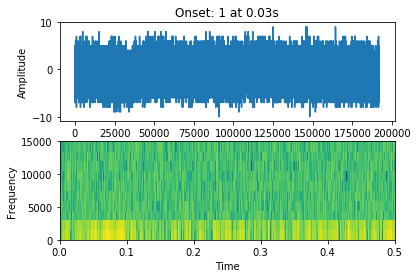

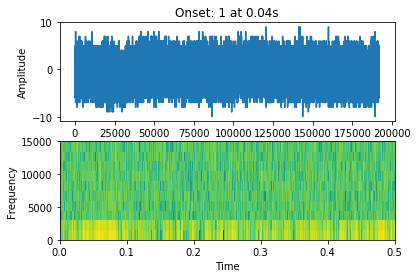

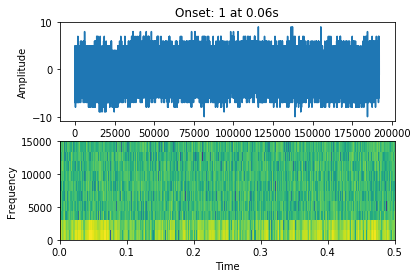

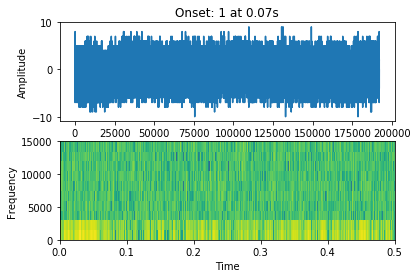

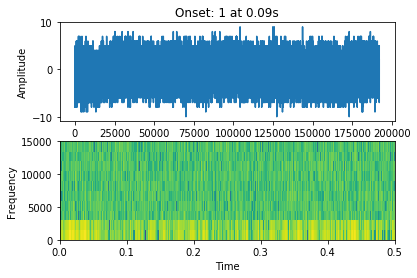

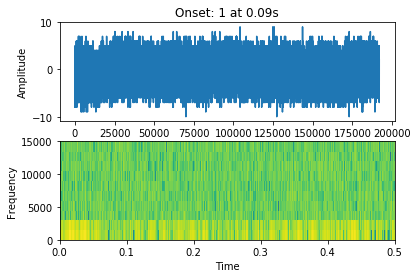

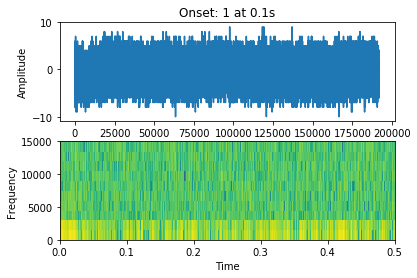

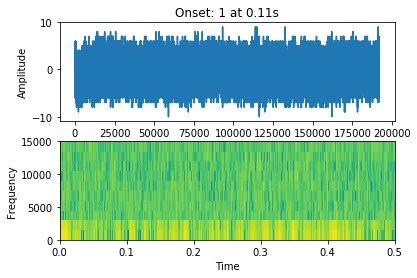

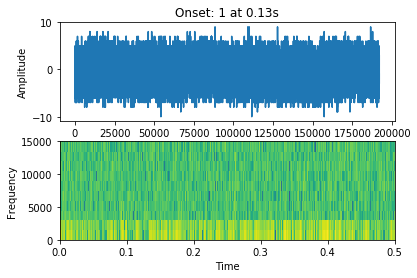

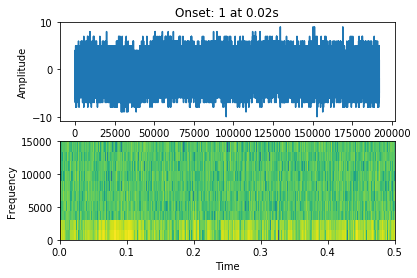

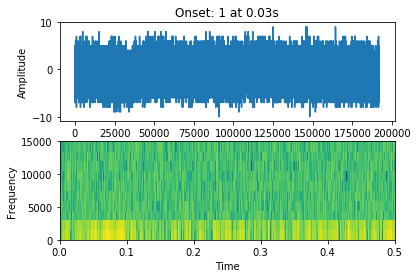

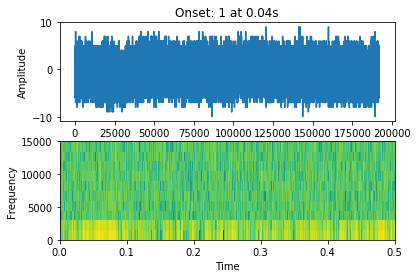

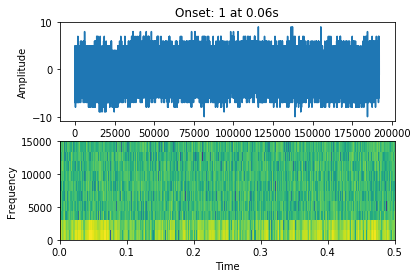

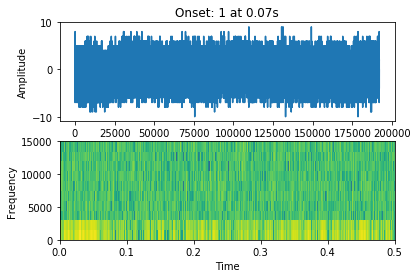

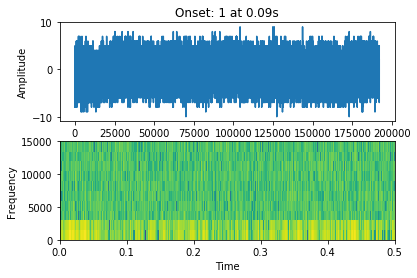

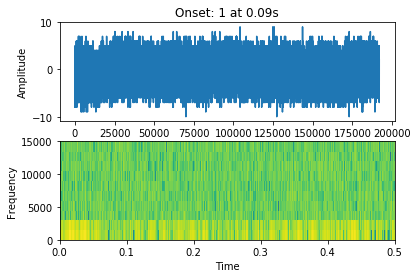

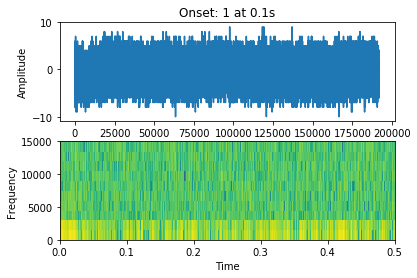

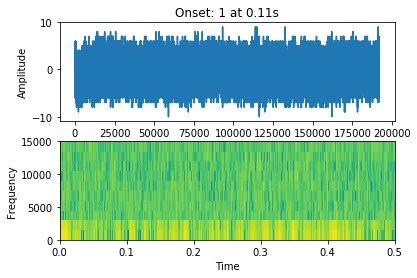

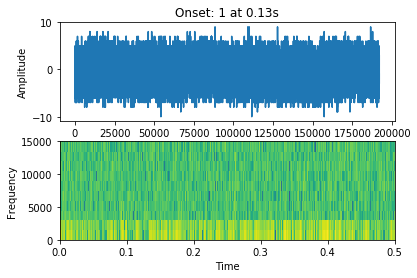

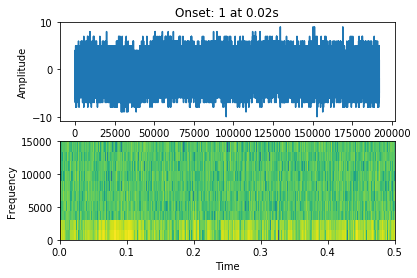

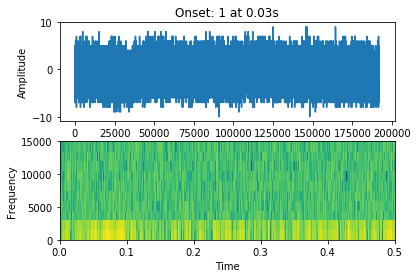

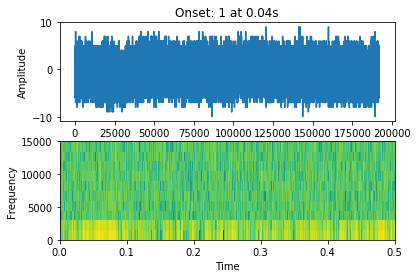

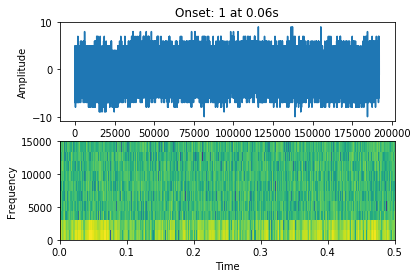

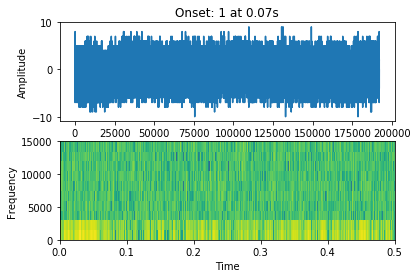

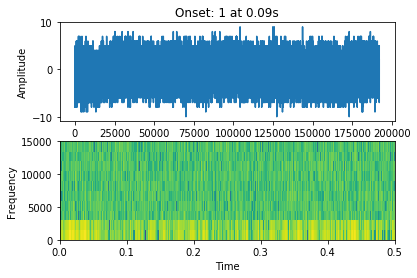

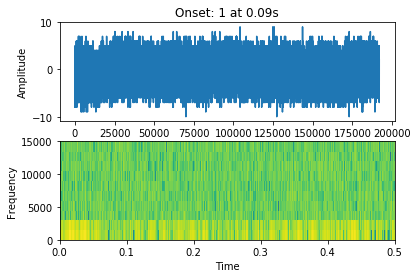

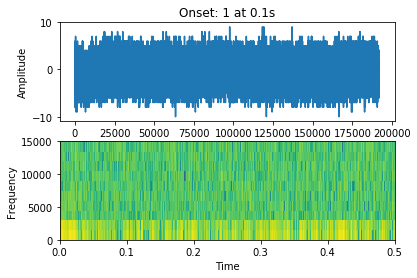

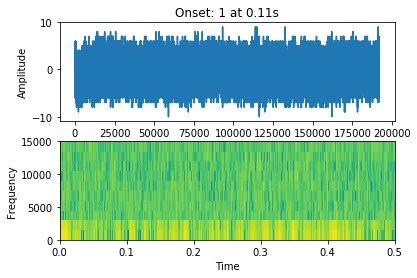

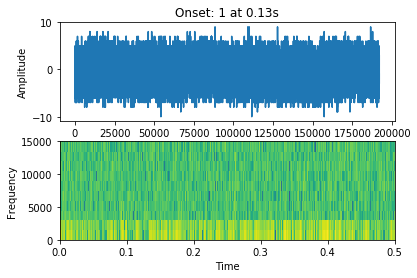

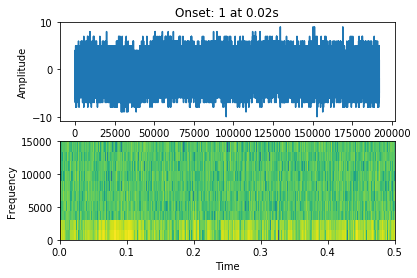

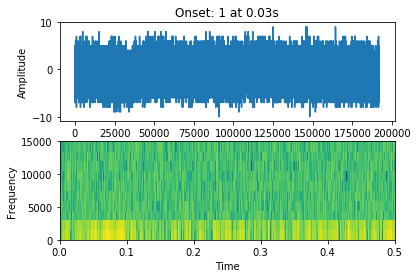

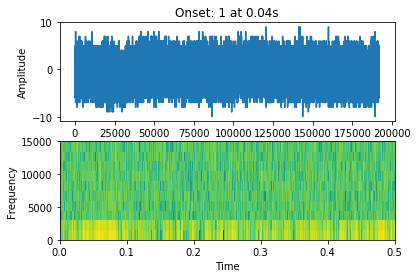

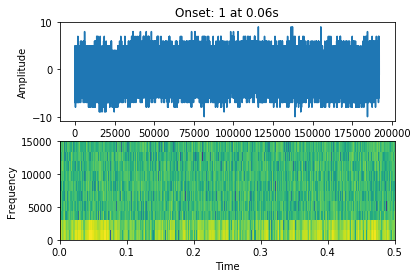

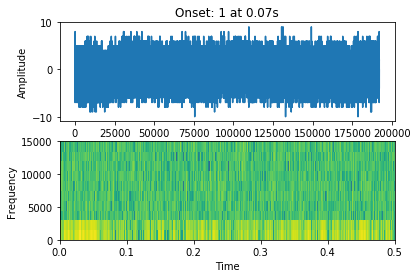

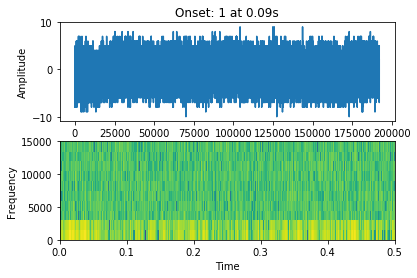

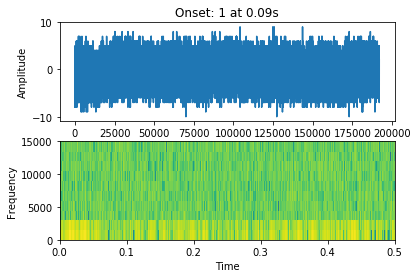

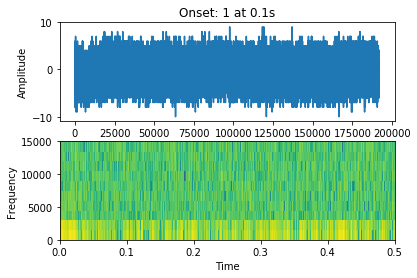

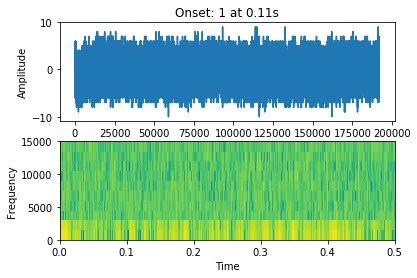

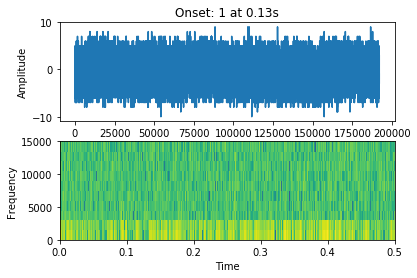

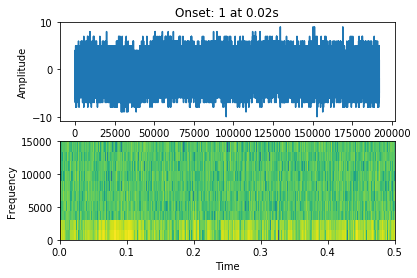

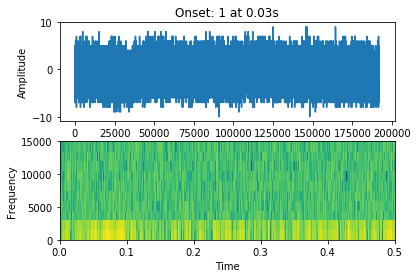

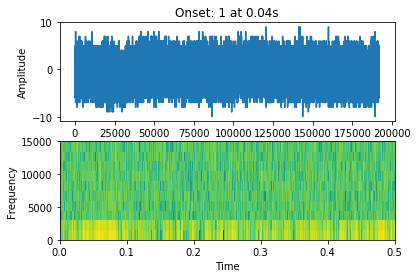

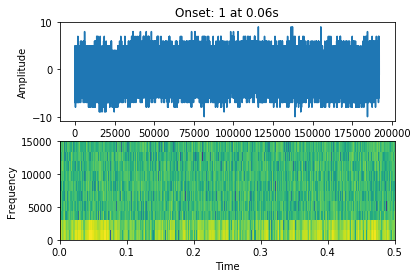

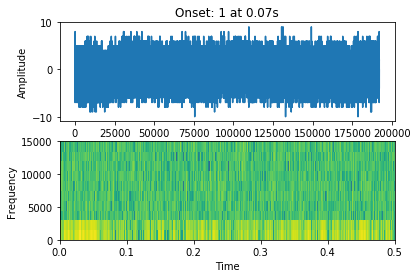

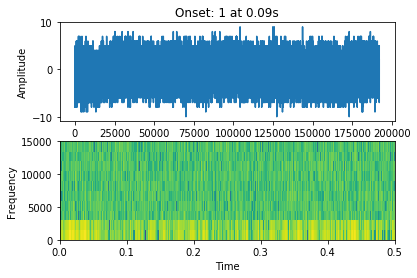

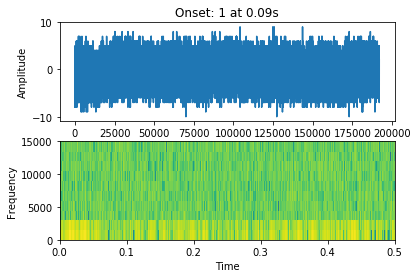

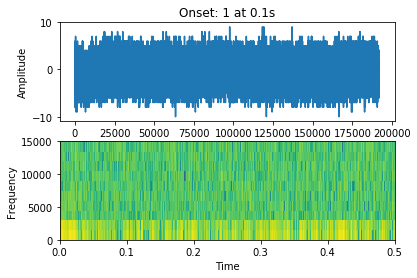

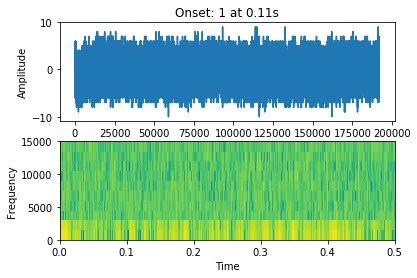

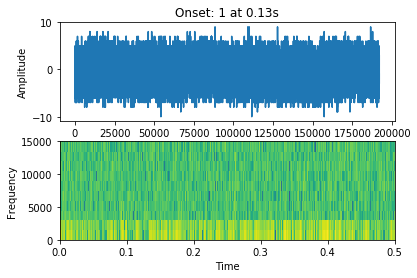

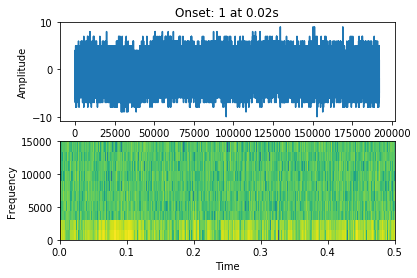

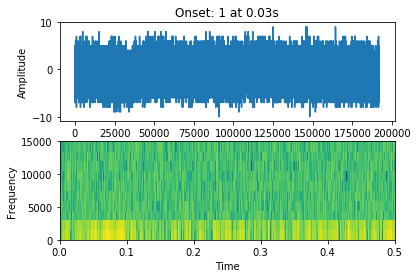

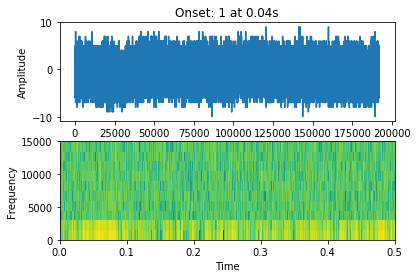

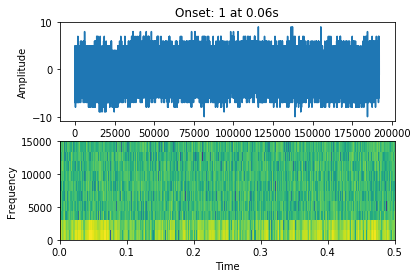

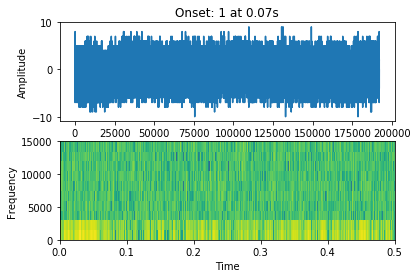

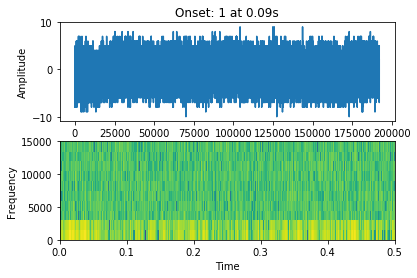

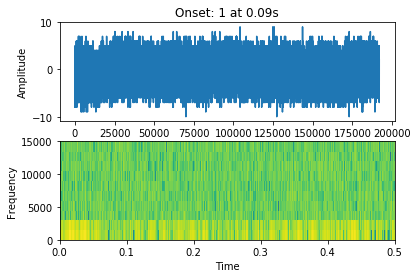

In [ ]:
for i in range(len(data_indices)):
    d = data[data_indices[i]]
    rd = resampled_data[i]
    onsets = peaks[i]
    onsets *= int(d.rate/rd.rate)
    for onset in onsets:
        start = onset
        end = int(start+0.5*d.rate)
        crop = np.array(d.data[start:end])
        t = round(start/data[0].rate, 2)
        plot("Onset: {} at {}s".format(i+1, t), crop, d.rate, (0, 15000))